###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, G.F. Forsyth, C.D. Cooper. Based on [CFD Python](https://github.com/barbagroup/CFDPython), (c)2013 L.A. Barba, also under CC-BY.

# Space & Time

## Introduction to numerical solution of PDEs

Welcome to *Space and Time: Introduction to finite-difference solutions of PDEs*, the second module of ["Practical Numerical Methods with Python"](https://openedx.seas.gwu.edu/courses/course-v1:MAE+MAE6286+2017/about). 

In the first module, we looked into numerical integration methods for the solution of ordinary differential equations (ODEs), using the phugoid model of glider flight as a motivation. In this module, we will study the numerical solution of *partial differential equations (PDEs)*, where the unknown is a multi-variate function. The problem could depend on time, $t$, and one spatial dimension $x$ (or more), which means we need to build a discretization grid with each independent variable.

We will start our discussion of numerical PDEs with 1-D linear and non-linear convection equations, the 1-D diffusion equation, and 1-D Burgers' equation. We hope you will enjoy them!

## 1D linear convection

The *one-dimensional linear convection equation* is the simplest, most basic model that can be used to learn something about numerical solution of PDEs. It's surprising that this little equation can teach us so much! Here it is:

$$
\begin{equation}
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0
\end{equation}
$$

The equation represents a *wave* propagating with speed $c$ in the $x$ direction, without change of shape. For that reason, it's sometimes called the *one-way wave equation* (sometimes also the *advection equation*).

With an initial condition $u(x,0)=u_0(x)$, the equation has an exact solution given by:

$$
\begin{equation}
u(x,t)=u_0(x-ct)
\end{equation}
$$

Go on: check it. Take the time and space derivative and stick them into the equation to see that it holds!

Look at the exact solution for a moment ... we know two things about it: 

1. its shape does not change, being always the same as the initial wave, $u_0$, only shifted in the $x$-direction; and 
2. it's constant along so-called **characteristic curves**, $x-ct=$constant. This means that for any point in space and time, you can move back along the characteristic curve to $t=0$ to know the value of the solution.

![characteristics](figures/characteristics.png)
#### Characteristic curves for positive wave speed.

Why do we call the equations *linear*? PDEs can be either linear or non-linear. In a linear equation, the unknown function $u$ and its derivatives appear only in linear terms, in other words, there are no products, powers, or transcendental functions applied on them. 

What is the most important feature of linear equations? Do you remember? In case you forgot: solutions can be superposed to generate new solutions that still satisfy the original equation. This is super useful!

## Finite-differences

In the previous lessons, we discretized time derivatives; now we have derivatives in both space *and* time, so we need to discretize with respect to *both* these variables. 

Imagine a *space-time* plot, where the coordinates in the vertical direction represent advancing in time—for example, from $t^n$ to $t^{n+1}$—and the coordinates in the horizontal direction move in space: consecutive points are $x_{i-1}$, $x_i$, and $x_{i+1}$.  This creates a grid where a point has both a temporal and spatial index. Here is a graphical representation of the space-time grid:

$$
\begin{matrix}
t^{n+1} & \rightarrow & \bullet  && \bullet  && \bullet  \\
t^n & \rightarrow & \bullet  && \bullet  && \bullet  \\
& &  x_{i-1} && x_i && x_{i+1}
\end{matrix}
$$

For the numerical solution of $u(x,t)$, we'll use subscripts to denote the spatial position, like $u_i$, and superscripts to denote the temporal instant, like $u^n$.  We would then label the solution at the top-middle point in the grid above as follows:
$u^{n+1}_{i}$.

Each grid point below has an index $i$, corresponding to the spatial position and increasing to the right, and an index $n$, corresponding to the time instant and increasing upwards.  A small grid segment would have the following values of the numerical solution at each point:

$$
\begin{matrix}
& &\bullet & & \bullet & &  \bullet \\
& &u^{n+1}_{i-1} & & u^{n+1}_i & & u^{n+1}_{i+1} \\
& &\bullet & & \bullet & &  \bullet \\
& &u^n_{i-1} & & u^n_i & & u^n_{i+1} \\
& &\bullet & & \bullet & &  \bullet \\
& &u^{n-1}_{i-1} & & u^{n-1}_i & & u^{n-1}_{i+1} \\
\end{matrix}
$$

Another way to explain our discretization grid is to say that it is built with constant steps in time and space, $\Delta t$ and $\Delta x$, as follows:

$$
\begin{eqnarray}
x_i &=& i\, \Delta x \quad \text{and} \quad t^n= n\, \Delta t \nonumber \\
u_i^n &=& u(i\, \Delta x, n\, \Delta t)
\end{eqnarray}
$$

### Discretizing our model equation

Let's see how to discretize the 1-D linear convection equation in both space and time.  By definition, the partial derivative with respect to time changes only with time and not with space; its discretized form changes only the $n$ indices.  Similarly, the partial derivative with respect to $x$ changes with space not time, and only the $i$ indices are affected.  

We'll discretize the spatial coordinate $x$ into points indexed from $i=0$ to $N$, and then step in discrete time intervals of size $\Delta t$.

From the definition of a derivative (and simply removing the limit), we know that for $\Delta x$ sufficiently small:

$$
\begin{equation}
\frac{\partial u}{\partial x}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x}
\end{equation}
$$

This formula could be applied at any point $x_i$. But note that it's not the only way that we can estimate the derivative. The geometrical interpretation of the first derivative $\partial u/ \partial x$ at any point is that it represents the slope of the tangent to the curve $u(x)$. In the sketch below, we show a slope line at $x_i$ and mark it as "exact." If the formula written above is applied at $x_i$, it approximates the derivative using the next spatial grid point: it is then called a _forward difference_ formula. 

But as shown in the sketch below, we could also estimate the spatial derivative using the point behind $x_i$, in which case it is called a _backward difference_. We could even use the two points on each side of $x_i$, and obtain what's called a _central difference_ (but in that case the denominator would be $2\Delta x$).

![FDapproxiamtions](figures/FDapproxiamtions.png)
#### Three finite-difference approximations at $x_i$.

We have three possible ways to represent a discrete form of $\partial u/ \partial x$:

* Forward difference: uses $x_i$ and $x_i + \Delta x$,
* Backward difference: uses $x_i$ and $x_i- \Delta x$,
* Central difference: uses two points on either side of $x_i$.

The sketch above also suggests that some finite-difference formulas might be better than others: it looks like the *central difference* approximation is closer to the slope of the "exact" derivative. Curious if this is just an effect of our exaggerated picture? We'll show you later how to make this observation rigorous!

The three formulas are:

$$
\begin{eqnarray}
\frac{\partial u}{\partial x} & \approx & \frac{u(x_{i+1})-u(x_i)}{\Delta x} \quad\text{Forward}\\
\frac{\partial u}{\partial x} & \approx & \frac{u(x_i)-u(x_{i-1})}{\Delta x} \quad\text{Backward}\\
\frac{\partial u}{\partial x} & \approx & \frac{u(x_{i+1})-u(x_{i-1})}{2\Delta x} \quad\text{Central}
\end{eqnarray}
$$

Euler's method is equivalent to using a forward-difference scheme for the time derivative. Let's stick with that, and choose the backward-difference scheme for the space derivative.  Our discrete equation is then:

$$
\begin{equation}
\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0
\end{equation}
$$

where $n$ and $n+1$ are two consecutive steps in time, while $i-1$ and $i$ are two neighboring points of the discretized $x$ coordinate. With given initial conditions, the only unknown in this discretization is $u_i^{n+1}$.  We solve for this unknown to get an equation that lets us step in time, as follows:

$$
\begin{equation}
u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)
\end{equation}
$$

We like to make drawings of a grid segment, showing the grid points that influence our numerical solution. This is called a **stencil**. Below is the stencil for solving our model equation with the finite-difference formula we wrote above.

![FTBS_stencil](figures/FTBS_stencil.png)
#### Stencil for the "forward-time/backward-space" scheme.

## And compute!

Alright. Let's get a little Python on the road. First: we need to load our array and plotting libraries, as usual.

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

We also set notebook-wide plotting parameters for the font family and the font size by modifying entries of the `rcParams` dictionary.

In [2]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

As a first exercise, we'll solve the 1D linear convection equation with a *square wave* initial condition, defined as follows:

$$
\begin{equation}
u(x,0)=\begin{cases}2 & \text{where } 0.5\leq x \leq 1,\\
1 & \text{everywhere else in } (0, 2)
\end{cases}
\end{equation}
$$

We also need a boundary condition on $x$: let $u=1$ at $x=0$. Our spatial domain for the numerical solution will only cover the range $x\in (0, 2)$.

![squarewave](figures/squarewave.png)
#### Square wave initial condition.

Now let's define a few variables; we want to make an evenly spaced grid of points within our spatial domain. In the code below, we define a variable called `nx` that will be the number of spatial grid points, and a variable `dx` that will be the distance between any pair of adjacent grid points. We also can define a step in time, `dt`, a number of steps, `nt`, and a value for the wave speed: we like to keep things simple and make $c=1$.  

In [3]:
# Set parameters.
nx = 41  # number of spatial discrete points
L = 2.0  # length of the 1D domain
dx = L / (nx - 1)  # spatial grid size
nt = 25  # number of time steps
dt = 0.02  # time-step size
c = 1.0  # convection speed

# Define the grid point coordinates.
x = numpy.linspace(0.0, L, num=nx)

We also need to set up our initial conditions. Here, we use the NumPy function `numpy.ones()` defining an array which is `nx`-element long with every value equal to $1$. How useful! We then *change a slice* of that array to the value $u=2$, to get the square wave, and we print out the initial array just to admire it. But which values should we change?  The problem states that we need to change the indices of `u` such that the square wave begins at $x = 0.5$ and ends at $x = 1$.

We can use the [`numpy.where()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) function to return a list of indices where the vector $x$ meets some conditions.
The function [`numpy.logical_and()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logical_and.html) computes the truth value of `x >= 0.5` **and** `x <= 1.0`, element-wise.

In [4]:
# Set initial conditions with 1.0 everywhere (for now).
u0 = numpy.ones(nx)
# Get a list of indices where 0.5 <= x <= 1.0.
mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
print(mask)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),)


With the list of indices, we can now update our initial conditions to get a square-wave shape.

In [5]:
# Set initial condition u = 2.0 where 0.5 <= x <= 1.0.
u0[mask] = 2.0
print(u0)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Now let's take a look at those initial conditions we've built with a handy plot.

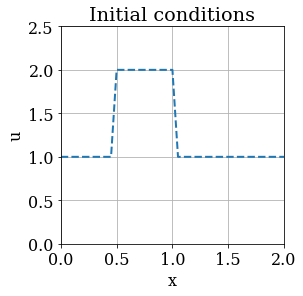

In [6]:
# Plot the initial conditions.
pyplot.figure(figsize=(4.0, 4.0))
pyplot.title('Initial conditions')
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, color='C0', linestyle='--', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);

It does look pretty close to what we expected. But it looks like the sides of the square wave are not perfectly vertical. Is that right? Think for a bit.

Now it's time to write some code for the discrete form of the convection equation using our chosen finite-difference scheme. 

For every element of our array `u`, we need to perform the operation: 

$$
u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)
$$

We'll store the result in a new (temporary) array `un`, which will be the solution $u$ for the next time-step.  We will repeat this operation for as many time-steps as we specify and then we can see how far the wave has traveled.  

We first initialize the placeholder array `un` to hold the values we calculate for the $n+1$ time step, using once again the NumPy function `ones()`.

Then, we may think we have two iterative operations: one in space and one in time (we'll learn differently later), so we may start by nesting a spatial loop inside the time loop, as shown below. You see that the code for the finite-difference scheme is a direct expression of the discrete equation: 

In [7]:
u = u0.copy()
for n in range(1, nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i - 1])

**Note 1**—We stressed above that our physical problem needs a boundary condition at $x=0$. Here we do not need to impose it at every iteration because our discretization does not change the value of u[0]: it remains equal to one and our boundary condition is therefore satisfied during the whole computation!

**Note 2**—We will learn later that the code as written above is quite inefficient, and there are better ways to write this, Python-style. But let's carry on.

Now let's inspect our solution array after advancing in time with a line plot.

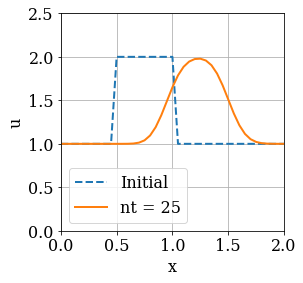

In [8]:
# Plot the solution after nt time steps
# along with the initial conditions.
pyplot.figure(figsize=(4.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
pyplot.plot(x, u, label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);

That's funny. Our square wave has definitely moved to the right, but it's no longer in the shape of a top-hat. **What's going on?**

##### Dig deeper

The solution differs from the expected square wave because the discretized equation is an approximation of the continuous differential equation that we want to solve. There are errors: we knew that. But the modified shape of the initial wave is something curious. Maybe it can be improved by making the grid spacing finer. Why don't you try it? Does it help?

## Spatial truncation error

Recall the finite-difference approximation we are using for the spatial derivative:

$$
\begin{equation}
\frac{\partial u}{\partial x}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x}
\end{equation}
$$

We obtain it by using the definition of the derivative at a point, and simply removing the limit, in the assumption that $\Delta x$ is very small. But we already learned with Euler's method that this introduces an error, called the *truncation error*.

Using a Taylor series expansion for the spatial terms now, we see that the backward-difference scheme produces a first-order method, in space.

$$
\begin{equation}
\frac{\partial u}{\partial x}(x_i) = \frac{u(x_i)-u(x_{i-1})}{\Delta x} + \frac{\Delta x}{2} \frac{\partial^2 u}{\partial x^2}(x_i) - \frac{\Delta x^2}{6} \frac{\partial^3 u}{\partial x^3}(x_i)+ \cdots
\end{equation}
$$

The dominant term that is neglected in the finite-difference approximation is of $\mathcal{O}(\Delta x)$. We also see that the approximation *converges* to the exact derivative as $\Delta x \rightarrow 0$. That's good news!

In summary, the chosen "forward-time/backward space" difference scheme is first-order in both space and time: the truncation errors are $\mathcal{O}(\Delta t, \Delta x)$. We'll come back to this!

## Non-linear convection

Let's move on to the non-linear convection equation, using the same methods as before. The 1-D convection equation is:

$$
\begin{equation}
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0
\end{equation}
$$

The only difference with the linear case is that we've replaced the constant wave speed $c$ by the variable speed $u$. The equation is non-linear because now we have a product of the solution and one of its derivatives: the product $u\,\partial u/\partial x$. This changes everything!

We're going to use the same discretization as for linear convection: forward difference in time and backward difference in space. Here is the discretized equation:

$$
\begin{equation}
\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0
\end{equation}
$$

Solving for the only unknown term, $u_i^{n+1}$, gives an equation that can be used to advance in time:

$$
\begin{equation}
u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)
\end{equation}
$$

There is very little that needs to change from the code written so far. In fact, we'll even use the same square-wave initial condition. But let's re-initialize the variable `u` with the initial values, and re-enter the numerical parameters here, for convenience (we no longer need $c$, though).

In [9]:
# Set parameters.
nx = 41  # number of spatial discrete points
L = 2.0  # length of the 1D domain
dx = L / (nx - 1)  # spatial grid size
nt = 10  # number of time steps
dt = 0.02  # time-step size

x = numpy.linspace(0.0, L, num=nx)
u0 = numpy.ones(nx)
mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
u0[mask] = 2.0

 How does it look?

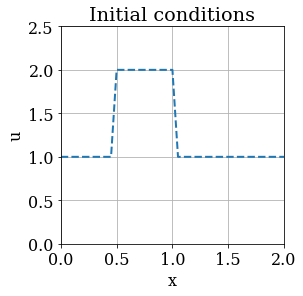

In [10]:
# Plot the initial conditions.
pyplot.figure(figsize=(4.0, 4.0))
pyplot.title('Initial conditions')
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, color='C0', linestyle='--', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);

Changing just one line of code in the solution of linear convection, we are able to now get the non-linear solution: the line that corresponds to the discrete equation now has `un[i]` in the place where before we just had `c`. So you could write something like:

```Python
for n in range(1, nt):  
  un = u.copy() 
  for i in range(1, nx): 
    u[i] = un[i] - un[i]*dt/dx*(un[i]-un[i-1]) 
```

We're going to be more clever than that and use NumPy to update all values of the spatial grid in one fell swoop. We don't really need to write a line of code that gets executed *for each* value of $u$ on the spatial grid. Python can update them all at once! Study the code below, and compare it with the one above. Here is a helpful sketch, to illustrate the array operation—also called a "vectorized" operation—for $u_i-u_{i-1}$.

![vectorizedstencil](figures/vectorizedstencil.png)

<br>
#### Sketch to explain vectorized stencil operation.  Adapted from ["Indices point between elements"](https://blog.nelhage.com/2015/08/indices-point-between-elements/) by Nelson Elhage.  

In [11]:
# Compute the solution using Euler's method and array slicing.
u = u0.copy()
for n in range(1, nt):
    u[1:] = u[1:] - dt / dx * u[1:] * (u[1:] - u[:-1])

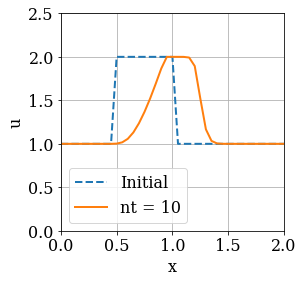

In [12]:
# Plot the solution after nt time steps
# along with the initial conditions.
pyplot.figure(figsize=(4.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
pyplot.plot(x, u, label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);

Hmm. That's quite interesting: like in the linear case, we see that we have lost the sharp sides of our initial square wave, but there's more. Now, the wave has also lost symmetry! It seems to be lagging on the rear side, while the front of the wave is steepening. Is this another form of numerical error, do you ask? No! It's physics!

##### Dig deeper

Think about the effect of having replaced the constant wave speed $c$ by the variable speed given by the solution $u$. It means that different parts of the wave move at different speeds. Make a sketch of an initial wave and think about where the speed is higher and where it is lower ...

## References

* Elhage, Nelson (2015), ["Indices point between elements"](https://blog.nelhage.com/2015/08/indices-point-between-elements/)

---

###### The cell below loads the style of the notebook.

In [13]:
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())